In [70]:
from Thorlabs_PM101R import Device
import time
import numpy as np
import pandas as pd
import pint
import pint_pandas
import scipy.constants as sc
import matplotlib.pyplot as plt
pint_pandas.PintType.ureg.default_format = "~P"
unit = pint.UnitRegistry()
unit.setup_matplotlib()
unit.mpl_formatter = "{:~P}"
pint.set_application_registry(unit)

In [71]:
def cm_to_inch(value):
    return value / 2.54

In [72]:
device = Device()

In [73]:
beginning = time.perf_counter()
start_time = (time.perf_counter() - beginning)
time_values = []
data_values = []

i = 0
while i<5_000:
    current_time = time.perf_counter()-beginning
    value = device.get_data()
    time_values.append(current_time)
    data_values.append(value)
    i+=1

df = pd.DataFrame({'Time (s)': time_values, 'Power (Watts)': data_values})

In [74]:
df_1 = df[0:-1:10]

In [75]:
df

,Time (s),Power (Watts)
0,0.001808,0.000002
1,0.004297,0.000002
2,0.006161,0.000002
3,0.007415,0.000002
4,0.009195,0.000002
...,...,...
4995,6.169359,0.000005
4996,6.171230,0.000005
4997,6.173441,0.000005
4998,6.175186,0.000005


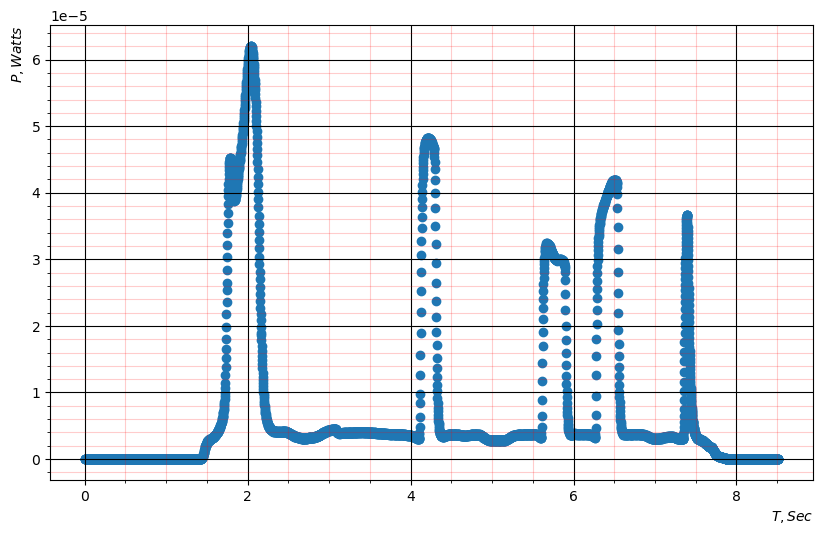

In [69]:
plt.figure(figsize=(cm_to_inch(25), cm_to_inch(15)))
plt.scatter(df['Time (s)'], df['Power (Watts)'])
plt.xlabel(r'$T, Sec$', loc="right")
plt.ylabel(r'$P, Watts$', loc="top")
plt.grid(which='major', color='k', linestyle='-')
plt.grid(which='minor', color='r', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.show()

In [67]:
df.to_csv('3.csv')